# DBSCAN

In [158]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Load and format the data

We're going to load the iris data from the scikit "datasets" package

In [159]:
iris = datasets.load_iris()

#### 1.1 Define the variables

Define your "X" and "y" variables for the analysis

In [160]:
X, y = iris.data, iris.target

#### 1.2 Standardize X 

In [161]:
X = StandardScaler().fit_transform(X)

## Visualize the Data

In [162]:
#plt.scatter(X[:,0], X[:,1])

In [163]:
#plt.scatter(X[:,1], X[:,2])

In [164]:
#plt.scatter(X[:,2], X[:,3])

We can begin to see that there are two definitive clusters 

## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

Let's set up the DBSCAN from scikit using an epsilon of .5 and a minimum sample number of 5

In [165]:
dbscn = DBSCAN(eps = .5, min_samples = 5).fit(X)  

In [166]:
dbscn.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147])

#### 3.2 Labels

Next, we'll find the labels calculated by DBSCAN

In [167]:
labels = dbscn.labels_

In [168]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

**What information can we derive from the lables?**: The negative one labels are assigned to noisy samples 

In [169]:
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscn.core_sample_indices_] = True 

In [170]:
print(core_samples)

[ True  True  True  True  True  True  True  True False  True  True  True
  True False False False False  True False  True  True  True False  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False  True False  True  True False False  True False
 False  True False  True  True  True  True  True False  True False  True
 False  True  True  True False  True  True  True  True  True  True  True
 False False  True False  True  True  True  True  True False  True  True
  True  True False  True False  True False  True  True False False False
 False False  True  True  True False False False  True False False False
  True False False  True False False  True False False False False False
 False  True False False False  True  True  True  True  True  True  True
 False  True False  True False False]


In [171]:
df = pd.DataFrame(core_samples, columns=['Core?'])
df['label'] = labels
df.head()

,Core?,label
0,True,0
1,True,0
2,True,0
3,True,0
4,True,0


In [172]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [173]:
set(labels)

{-1, 0, 1}

Now, we can use a handy chunk of code from the Scitkit documentation to measure the performance of our model 

In [174]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Score: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.489
Completeness: 0.510
V-measure: 0.500
Adjusted Rand Index: 0.428
Adjusted Mutual Information: 0.483
Silhouette Score: 0.349


**What do these metrics tell us?**

#### 3.3 Plot the resulting clusters

In [175]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
colors

array([[ 0.61960787,  0.00392157,  0.25882354,  1.        ],
       [ 0.99807766,  0.99923107,  0.74602078,  1.        ],
       [ 0.36862746,  0.30980393,  0.63529414,  1.        ]])

In [176]:
class_member_mask = (labels == label)
class_member_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,

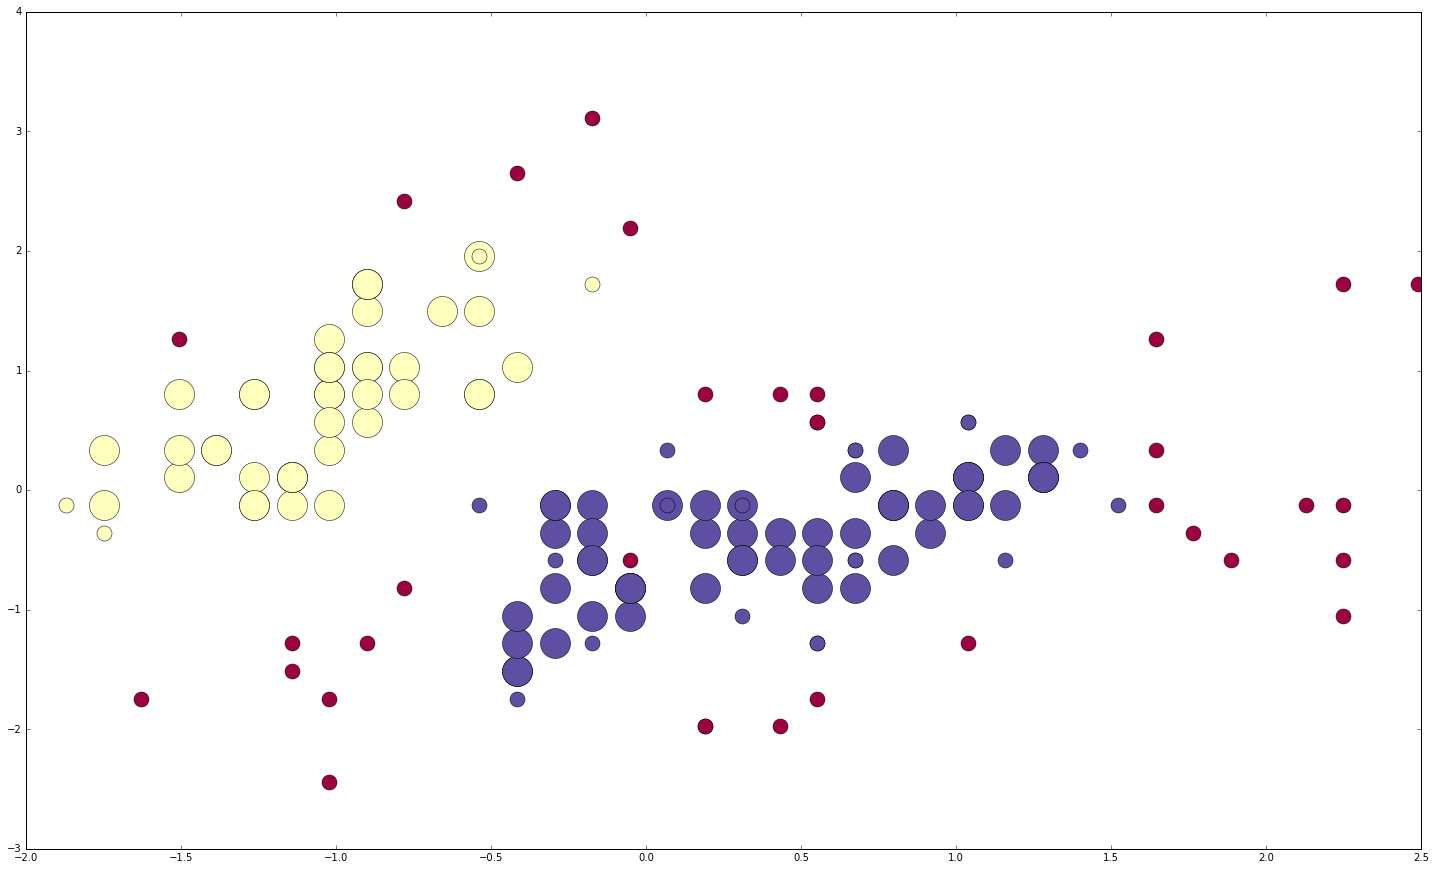

In [177]:
plt.figure(figsize=(25,15))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 30)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 15)

## Find epsilon using k-distance

In [178]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=len(X)).fit(X)
distances, indices = nn.kneighbors(X)

In [179]:
pd.DataFrame(indices).head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,17,27,40,39,4,28,7,26,11,...,102,107,130,109,105,131,135,117,122,118
1,1,25,45,12,37,9,34,30,3,35,...,144,107,130,105,109,135,122,118,131,117
2,2,47,29,3,30,42,35,34,37,9,...,102,107,130,109,105,135,122,131,117,118
3,3,47,30,29,2,38,42,45,12,9,...,102,107,130,109,105,135,122,131,117,118
4,4,0,40,17,27,21,48,7,39,46,...,108,107,109,130,131,105,117,135,122,118


In [180]:
pd.DataFrame(X).iloc[34:38]

,0,1,2,3
34,-1.143017,0.106445,-1.284407,-1.444450
35,-1.021849,0.337848,-1.455004,-1.312977
36,-0.416010,1.032057,-1.398138,-1.312977
37,-1.143017,0.106445,-1.284407,-1.444450


In [181]:
pd.DataFrame(distances).head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.0,0.131473,0.133848,0.187618,0.238288,0.261207,0.261207,0.267325,0.387691,0.445665,...,4.472085,4.606816,4.746481,4.776532,5.049614,5.067248,5.101910,5.138508,5.218476,5.627330
1,0.0,0.166182,0.178793,0.178793,0.272151,0.272151,0.272151,0.284893,0.434645,0.491738,...,4.512399,4.549649,4.639923,5.068215,5.097195,5.126054,5.138918,5.456362,5.506830,5.561923
2,0.0,0.133848,0.170597,0.284893,0.311981,0.363504,0.367925,0.377484,0.377484,0.377484,...,4.664042,4.787065,4.899546,5.160145,5.280614,5.338622,5.394453,5.565337,5.611127,5.736275
3,0.0,0.238288,0.248918,0.267325,0.284893,0.353849,0.353849,0.364407,0.364407,0.386549,...,4.661542,4.774157,4.881626,5.220139,5.283734,5.350504,5.379157,5.654791,5.691300,5.700876
4,0.0,0.261207,0.272151,0.292428,0.339864,0.374971,0.434645,0.466286,0.481772,0.491738,...,4.626843,4.751794,4.836633,4.901258,5.123096,5.180385,5.187934,5.234180,5.367851,5.784667


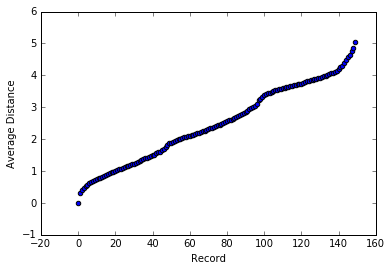

In [182]:
plt.scatter(range(150),pd.DataFrame(distances).mean())
plt.xlabel('Record')
plt.ylabel('Average Distance')